# Amir Hossein Shahriari 45747067
## COMP8420
### Assignment1 

#### Imported libraries and dependencies

In [12]:
import re
import pandas as pd
import numpy as np
import random
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Data Collection

for this task i will use a dataset from HuggingFace, the link to the data set is https://huggingface.co/datasets/shahxeebhassan/human_vs_ai_sentences, the dataset includes two columns, text and label.


In [5]:
ds = load_dataset("shahxeebhassan/human_vs_ai_sentences")

In [6]:
print(ds)
print(ds['train'][0])  # Look at a sample


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 105000
    })
})
{'text': 'Another reason why all students should have to participate in at least one extracurricular activity is because it develops stronger social skills.', 'label': 0}


In [7]:
from sklearn.model_selection import train_test_split

# Convert dataset to a pandas DataFrame for convenience:
df = ds['train'].to_pandas()
# Printing 5 rows of each label to see how they look
print(df[df['label']==0].head())
print(df[df['label']==1].head())


                                                text  label
0  Another reason why all students should have to...      0
1  Also the Electoral College consists of 538 ele...      0
2  Many countries have made changes in there town...      0
3  I believe the process of choosing a president ...      0
4  A thick cloud of carbon dioxide and heats to h...      0
                                                    text  label
10000  If people only feel comfortable around people ...      1
10001  On the other hand, it can lead to stress and b...      1
10002  The residents of all regions can feel that the...      1
10003  Because many connected products still lack bas...      1
10004  They can give you advice on how to set goals a...      1


### Data Preprocessing and Analysis

In this part I will preprocess the data by converting to lowercase, removing special characters/punctuation, and optionally stop words. Furthermore I will split the collected data into train, test and validation sets.

In [8]:
# I want 60% train, 20% validation, 20% test

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42, stratify=train_df['label'])

# Defining a custom preprocessing function
def custom_preprocessor(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and punctuation (leaving alphanumeric and whitespace)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        
    return text
    
from sklearn.feature_extraction.text import CountVectorizer

one_hot_vectorizer = CountVectorizer(
    binary=True,          # One-hot style
    max_features=10000,   
    ngram_range=(1,2),    # capture unigrams & bigrams
    stop_words='english'  
)

# Setting up TF-IDF with custom preprocessor
tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    preprocessor=custom_preprocessor,
    stop_words='english'  

)

X_train_tfidf = tfidf.fit_transform(train_df['text']).toarray()

X_val_tfidf = tfidf.transform(val_df['text']).toarray()

X_test_tfidf = tfidf.transform(test_df['text']).toarray()

X_train_one_hot = one_hot_vectorizer.fit_transform(train_df['text']).toarray()

X_val_one_hot = one_hot_vectorizer.transform(val_df['text']).toarray()

X_test_one_hot = one_hot_vectorizer.transform(test_df['text']).toarray()

y_train = train_df['label'].values

y_val = val_df['label'].values

y_test = test_df['label'].values
# Now I have a set of X_train, X_val, X_test containing the TF-IDF and One_Hot features of preprocessed text


I will reevaluate the size of each dataframe now and will 

In [9]:
print("Train set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Test set size:", len(test_df))
print("#################################")
print("Distributions:")
print("Label distribution in Train:")
print(train_df['label'].value_counts(normalize=True))
print("\nLabel distribution in Validation:")
print(val_df['label'].value_counts(normalize=True))
print("\nLabel distribution in Test:")
print(test_df['label'].value_counts(normalize=True))

Train set size: 63000
Validation set size: 21000
Test set size: 21000
#################################
Distributions:
Label distribution in Train:
label
0    0.5
1    0.5
Name: proportion, dtype: float64

Label distribution in Validation:
label
1    0.5
0    0.5
Name: proportion, dtype: float64

Label distribution in Test:
label
0    0.5
1    0.5
Name: proportion, dtype: float64


Next I will Print a few examples of the rows before and after the preprocessing.

In [10]:
sample_text = train_df['text'].iloc[0]
print("Original text:", sample_text)
print("Preprocessed text:", custom_preprocessor(sample_text))
print("################################################################################################################################")
sample_text = train_df['text'].iloc[1]
print("Original text:", sample_text)
print("Preprocessed text:", custom_preprocessor(sample_text))
print("################################################################################################################################")
sample_text = train_df['text'].iloc[2]
print("Original text:", sample_text)
print("Preprocessed text:", custom_preprocessor(sample_text))

Original text: So on April 8,2001 (MGS) drew close enough for a second look .
Preprocessed text: so on april 82001 mgs drew close enough for a second look 
################################################################################################################################
Original text: It is important for a business owner to stay on top of knowledge and experiences related to their business in order to remain diverse and competitive.
Preprocessed text: it is important for a business owner to stay on top of knowledge and experiences related to their business in order to remain diverse and competitive
################################################################################################################################
Original text: You have no way to tell if what they're saying is true, and, if they deliver it more confidently, you may already be convinced it's a fact.
Preprocessed text: you have no way to tell if what theyre saying is true and if they deliver it 

In [13]:
feature_names = one_hot_vectorizer.get_feature_names_out()
print("Number of features:", len(feature_names))

# Printing a random sample of feature names
def print_random_feature_samples(feature_names, num_samples=50):
    if len(feature_names) == 0:  # Corrected check for emptiness
        print("Feature names list is empty.")
        return

    if num_samples > len(feature_names):
        num_samples = len(feature_names)

    random_samples = random.sample(list(feature_names), num_samples) # cast to list for sample
    print("Sample of feature names (random positions):", random_samples)

print_random_feature_samples(feature_names)


Number of features: 10000
Sample of feature names (random positions): ['disruption', 'unable', 'products', 'able learn', 'suitable', 'text message', 'failures', 'glimpse', 'clear', 'percent greenhouse', 'different opinions', 'let', 'better understand', 'pick president', 'classes', 'voter', 'differ', 'winning focusing', 'lifestyle', 'stay focused', 'motorists', 'different', 'established founding', 'good', 'daily lives', 'soil', 'science', 'pollution improve', 'alien life', 'understand importance', 'wider', 'helps build', 'ocean', 'students interact', 'face natural', 'school extracurricular', 'people electoral', 'baby', '67', 'wow', 'restores', 'city state', 'smartphones', 'consumer', 'average', 'advanced', 'district columbia', 'sharing services', 'physical mental', 'operations']


In [16]:
feature_names = tfidf.get_feature_names_out()
print("Number of features:", len(feature_names))

# Printing a random sample of feature names
def print_random_feature_samples(feature_names, num_samples=50):
    if len(feature_names) == 0:  # Corrected check for emptiness
        print("Feature names list is empty.")
        return

    if num_samples > len(feature_names):
        num_samples = len(feature_names)

    random_samples = random.sample(list(feature_names), num_samples) # cast to list for sample
    print("Sample of feature names (random positions):", random_samples)

print_random_feature_samples(feature_names)


Number of features: 10000
Sample of feature names (random positions): ['duty', 'absolute', 'massive', 'apps', 'exceed', 'biking', 'cars expensive', 'source paris', 'detect', 'republican', 'school activity', 'opinions people', 'controlled', 'planning', 'think community', 'lot different', 'suburb', '57', 'sick', 'students teachers', 'examine', 'contribute climate', 'order create', 'work day', 'meats', 'twin', 'warmer layer', 'face face', '1998 mars', 'vote electors', 'explore different', 'stay healthy', 'conclusion think', 'help children', 'devices', 'thing people', 'silent', 'regularly', 'steering', 'help world', 'student learn', 'able choose', 'brains', '2006', '2000', 'help reduce', 'risks associated', 'unsafe', 'youre like', '513']


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# 3.1 Logistic Regression on One-Hot
clf_one_hot = LogisticRegression(max_iter=1000)
clf_one_hot.fit(X_train_one_hot, y_train)

# Evaluate on validation
val_preds_one_hot = clf_one_hot.predict(X_val_one_hot)
val_acc_one_hot = accuracy_score(y_val, val_preds_one_hot)
val_f1_one_hot = f1_score(y_val, val_preds_one_hot)

# 3.2 Logistic Regression on TF-IDF
clf_tfidf = LogisticRegression(max_iter=1000)
clf_tfidf.fit(X_train_tfidf, y_train)

# Evaluate on validation
val_preds_tfidf = clf_tfidf.predict(X_val_tfidf)
val_acc_tfidf = accuracy_score(y_val, val_preds_tfidf)
val_f1_tfidf = f1_score(y_val, val_preds_tfidf)

print("Validation results:")
print(f"One-Hot -> Accuracy: {val_acc_one_hot:.4f}, F1: {val_f1_one_hot:.4f}")
print(f"TF-IDF  -> Accuracy: {val_acc_tfidf:.4f}, F1: {val_f1_tfidf:.4f}")


Validation results:
One-Hot -> Accuracy: 0.8751, F1: 0.8730
TF-IDF  -> Accuracy: 0.8741, F1: 0.8746


In [20]:
feature_names_one_hot = one_hot_vectorizer.get_feature_names_out()
coefficients_one_hot = clf_one_hot.coef_[0]  # For binary classification -> one row

# Sorting by highest positive and most negative coefficients
top_positive_indices = np.argsort(coefficients_one_hot)[-10:]
top_negative_indices = np.argsort(coefficients_one_hot)[:10]

# Printing the top 10 features indicative of AI text
print("Top features indicative of AI-generated text (One-Hot):")
for idx in top_positive_indices:
    print(f"{feature_names_one_hot[idx]}: {coefficients_one_hot[idx]:.4f}")

# Printing the top 10 features indicative of Human text
print("\nTop features indicative of Human-generated text (One-Hot):")
for idx in top_negative_indices:
    print(f"{feature_names_one_hot[idx]}: {coefficients_one_hot[idx]:.4f}")


Top features indicative of AI-generated text (One-Hot):
increasingly: 2.5634
drawbacks: 2.5711
driver eyes: 2.5727
super: 2.6633
similarly: 2.6783
grade student: 2.7869
marijuana: 2.7918
gotta: 2.8317
additionally: 3.0946
hey: 3.0997

Top features indicative of Human-generated text (One-Hot):
proper_name: -3.1030
student_name: -2.9099
dont: -2.8735
thats: -2.6616
automobiles: -2.5701
everybody: -2.4422
doesnt: -2.2948
voting: -2.2741
venus: -2.2258
sincerely student_name: -2.2044


In [21]:
feature_names = tfidf.get_feature_names_out()
coefficients = clf_tfidf.coef_[0]  # assuming binary classification => one row of coefficients

# Sorting by highest positive weights
top_positive_indices = np.argsort(coefficients)[-10:]
top_negative_indices = np.argsort(coefficients)[:10]

# Printing the top 10 features indicative of AI text
print("Top features indicative of AI-generated text (TF-IDF):")
for idx in top_positive_indices:
    print(f"{feature_names[idx]}: {coefficients[idx]}")

# Printing the top 10 features indicative of Human text
print("\nTop features indicative of human-generated text (TF-IDF):")
for idx in top_negative_indices:
    print(f"{feature_names[idx]}: {coefficients[idx]}")


Top features indicative of AI-generated text (TF-IDF):
hey: 3.9955431345890835
importance: 4.047869560307934
provide: 4.161765682201635
super: 4.16441707563036
essential: 4.255301143376955
young people: 4.358319640954285
ensure: 4.457110382165662
significant: 4.541928702630156
potential: 4.735156022850329
additionally: 7.0217332683865035

Top features indicative of human-generated text (TF-IDF):
venus: -6.415573414840216
car: -4.923134514749023
students: -4.702959228749828
voting: -4.516779279014027
student: -4.36492334643746
driving: -4.35699127100087
nasa: -4.242962384042926
cars: -4.1781124049565355
phone: -4.125891578180387
smog: -4.108986585724564


/tmp/ipykernel_32290/4105574542.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_32290/4105574542.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


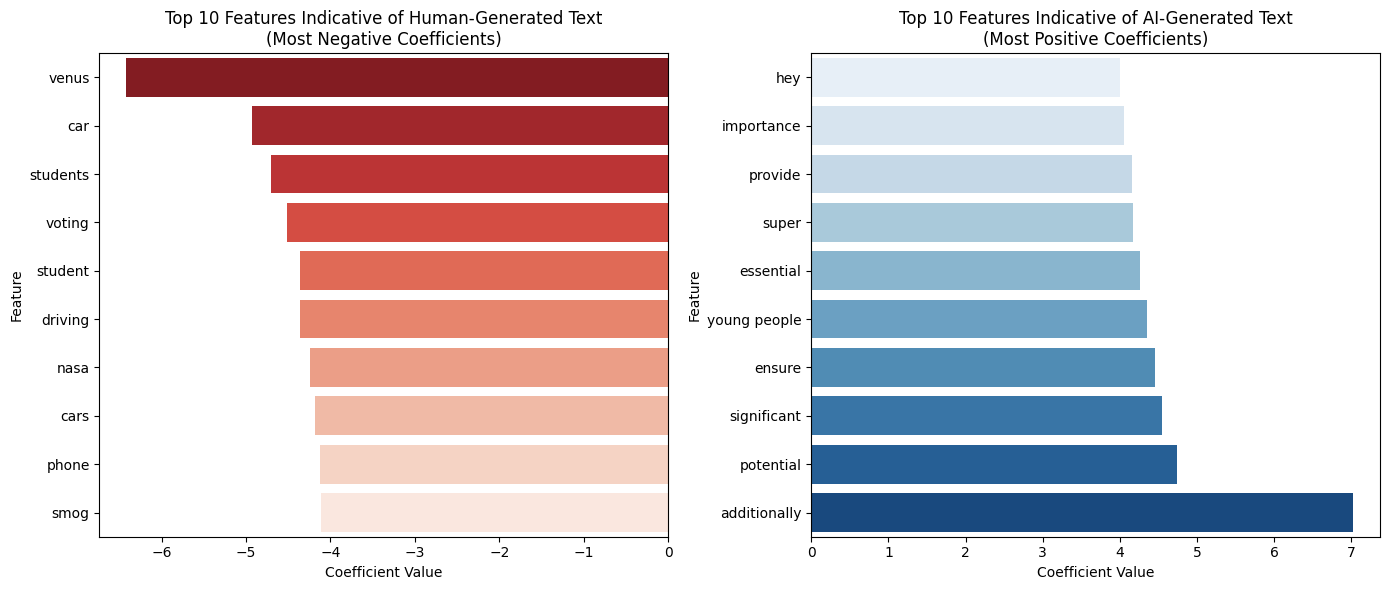

In [22]:
# Sorting indices by coefficient value
sorted_indices = np.argsort(coefficients)  # ascending order

# Top 10 negative (lowest coefficients => indicative of human text)
top_neg_indices = sorted_indices[:10]
top_neg_features = [feature_names[i] for i in top_neg_indices]
top_neg_values = [coefficients[i] for i in top_neg_indices]

# Top 10 positive (highest coefficients => indicative of AI-generated text)
top_pos_indices = sorted_indices[-10:]
top_pos_features = [feature_names[i] for i in top_pos_indices]
top_pos_values = [coefficients[i] for i in top_pos_indices]

plt.figure(figsize=(14, 6))

# --- Plot for Human (Top Negative Coefficients) ---
plt.subplot(1, 2, 1)
sns.barplot(
    x=top_neg_values,
    y=top_neg_features,
    orient='h',
    palette='Reds_r'
)
plt.title("Top 10 Features Indicative of Human-Generated Text\n(Most Negative Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")

# --- Plot for AI (Top Positive Coefficients) ---
plt.subplot(1, 2, 2)
sns.barplot(
    x=top_pos_values,
    y=top_pos_features,
    orient='h',
    palette='Blues'
)
plt.title("Top 10 Features Indicative of AI-Generated Text\n(Most Positive Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


/tmp/ipykernel_32290/1123971763.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_32290/1123971763.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


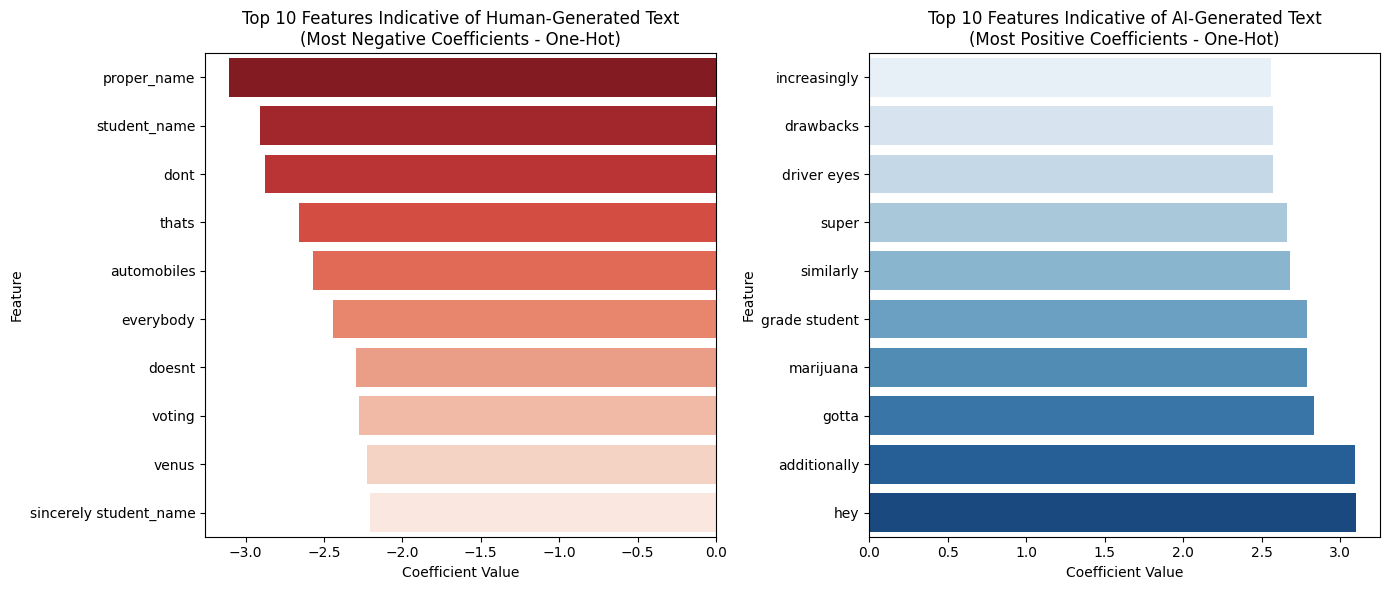

In [25]:
sorted_indices_one_hot = np.argsort(coefficients_one_hot)  

plt.figure(figsize=(14, 6))
# Top 10 negative (lowest coefficients => indicative of human text)
top_neg_indices_one_hot = sorted_indices_one_hot[:10]
top_neg_features_one_hot = [feature_names_one_hot[i] for i in top_neg_indices_one_hot]
top_neg_values_one_hot = [coefficients_one_hot[i] for i in top_neg_indices_one_hot]

# Top 10 positive (highest coefficients => indicative of AI-generated text)
top_pos_indices_one_hot = sorted_indices_one_hot[-10:]
top_pos_features_one_hot = [feature_names_one_hot[i] for i in top_pos_indices_one_hot]
top_pos_values_one_hot = [coefficients_one_hot[i] for i in top_pos_indices_one_hot]

# --- Plot for Human (Top Negative Coefficients) ---
plt.subplot(1, 2, 1)
sns.barplot(
    x=top_neg_values_one_hot,
    y=top_neg_features_one_hot,
    orient='h',
    palette='Reds_r'
)
plt.title("Top 10 Features Indicative of Human-Generated Text\n(Most Negative Coefficients - One-Hot)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")

# --- Plot for AI (Top Positive Coefficients) ---
plt.subplot(1, 2, 2)
sns.barplot(
    x=top_pos_values_one_hot,
    y=top_pos_features_one_hot,
    orient='h',
    palette='Blues'
)
plt.title("Top 10 Features Indicative of AI-Generated Text\n(Most Positive Coefficients - One-Hot)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()
